Data set & latar belakang masalah, Dzaki Ahmad F 

https://www.kaggle.com/datasets/muhammadiqbalmukati/top10-steam-games-dataset?select=Train.csv

Poblems :

*Video games* menjadi salah satu media hibuan yang banyak diminati oleh kalangan muda. Dengan kepopuleritas *video games* yang besar, tentunya memiliki beberapa kendala. Misalnya dalam masalah review dari user. Review dari user dapat menjadi pertimbangan bahwa game tersebut memiliki peforma yang bagus atau tidak. oleh karena itu di sini saya ingin melakukan sebuah model untuk  Natural Language Processing, sentiment analysis, yang digunakan untuk game review pada steam. Yang nantinya model ini dapat mengetahui review tersebut baik atau buruk. Sehingga game developer dapat melakukan *Improvement* pada game dan membuat *game experience* lebih memuaskan bagi pemain. Dan hal tersebut menjadi baik, penjualan game akan meningkat.

artikel pendukung :
- https://www.larksuite.com/en_us/topics/gaming-glossary/game-reviews
- https://www.blackflix.com/the-impact-of-reviews-on-gaming-sales

User : Game developer

# Perkenalan



Graded Challange 7

Nama : Dzaki Ahmad Fardian

Batch: HCK-024

Pada Graded Challange 7 ini, saya akan membuat seubah model deeplearning untuk dataset 'Steam Game Review'. Pada Dataset ini terdapat review dan tipe sentiment. Model nantinya dapat memprediksi apakah sebuah kalimat termasuk Positive Review atau Negative Review. Model ini dapat dipakai kedepannya jika sebuah game review tidak langsung memiliki tipe sentiment, seperti like/dislike dari product, Game Developer dapat menggunakan model ini untuk mendeteksi sentiment dari review tersebut. Dan mengapa hal ini diperlukan ? Dengan mengetahui kategori dari sentiment review dari sekian banyak review, Game Developer dapat menentukan langkah berikut dalam meng-improve Game buatan mereka.

# Import

In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import re

import tensorflow as tf
import tensorflow_hub as tf_hub
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Dropout, Reshape
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import pickle

from IPython.display import display, Image

# Data Loading

Dataset yang saya ambil hanya dataset dari file 'Train.csv'. Pada Website kaggle sudah displit menjadi Train dan Test.

Saya akan men-split manual untuk menjadi Train, Test, dan valuation.

In [2]:
df=pd.read_csv('Train.csv')
df

,Review,Translated_Review,Cleaned_Review,Sentiment,Game
0,It's full of bots and has been for years 10/10...,It's full of bots and has been for years 10/10...,s bots years great game,1,Team Fortress2
1,Yes,Yes,yes,1,GTA V
2,Moogus.,Moogus.,moogus,1,Team Fortress2
3,the worst game i done ever played in my life,the worst game i done ever played in my life,worst game played life,0,RUST
4,Pretty nice game. Solo Q is pretty okay so mak...,Pretty nice game. Solo Q is pretty okay so mak...,pretty nice game solo q pretty okay sure play ...,1,Apex Legends
...,...,...,...,...,...
101689,best goofy 1012 goofy fps h=game ever played a...,best goofy 1012 goofy fps h=game ever played a...,best goofy goofy fps h game played charm frien...,1,Team Fortress2
101690,Yea his game it like meat ball sub with weed i...,Yea his game it like meat ball sub with weed i...,yea game like meat ball sub weed hard stop play,1,Apex Legends
101691,HARD TO PLAY,HARD TO PLAY,hard play,0,Apex Legends
101692,i can't lunch the game after today updates.\nW...,i can't lunch the game after today updates.\nW...,t lunch game today updates fuuuu wrong game,0,PlayerUnknown's Battlegrounds


In [3]:
df[df['Translated_Review'].str.contains(r'\♥\b', case=False, na=False, regex=True)]

,Review,Translated_Review,Cleaned_Review,Sentiment,Game
174,I am 42.\nMy ex-wife and I have a daughter tog...,I am 42.\nMy ex-wife and I have a daughter tog...,ex wife daughter adopted son years old going s...,1,Counter-Strike Global Offensive
949,Asides from the cutscenes being locked at 30 f...,Asides from the cutscenes being locked at 30 f...,asides cutscenes locked fps widescreen feature...,1,MONSTER HUNTER RISE
2989,I am 52.\nMy ex-wife and I have a daughter tog...,I am 52.\nMy ex-wife and I have a daughter tog...,ex wife daughter adopted son years old going s...,1,Counter-Strike Global Offensive
4317,if you want to contemplate suicide for the 2 g...,if you want to contemplate suicide for the 2 g...,want contemplate suicide games withstand play ...,1,Apex Legends
7903,- DIFFICULTY -\n🔲 My 90 year old grandma could...,- DIFFICULTY -\n🔲 My 90 year old grandma could...,difficulty year old grandma play easy normal h...,0,Apex Legends
13336,I can't rate it 10/10 because the tenth player...,I can't rate it 10/10 because the tenth player...,t rate tenth player joins t rate players match...,1,Counter-Strike Global Offensive
14089,Absolutely ♥♥♥♥♥♥♥ chad. Nothing beats this ga...,Absolutely ♥♥♥♥♥♥♥ chad. Nothing beats this ga...,absolutely chad beats game watch understand le...,1,Team Fortress2
15967,I am 42.\nMy ex-wife and I have a daughter tog...,I am 42.\nMy ex-wife and I have a daughter tog...,ex wife daughter adopted son years old going s...,1,Apex Legends
16424,We're gonna skate to one song and one song onl...,We're gonna skate to one song and one song onl...,gonna skate song song ball hard muh wanna fine...,1,RUST
27289,♥♥♥♥♥♥shit,♥♥♥♥♥♥shit,shit,0,Counter-Strike Global Offensive


In [4]:
df['Translated_Review'].isnull().sum()

np.int64(0)

Drop columns 'Review', 'Cleaned_Review' dan 'Game'.

Hal ini dilakukan karena yang akan dipakai hanya 1 review dan sentiment pada feature dan target.

pada Cleaned_Review tidak dipakai karena missing word tadi.

In [5]:
df.drop(columns=['Review', 'Cleaned_Review', 'Game'], inplace=True)

In [6]:
df

,Translated_Review,Sentiment
0,It's full of bots and has been for years 10/10...,1
1,Yes,1
2,Moogus.,1
3,the worst game i done ever played in my life,0
4,Pretty nice game. Solo Q is pretty okay so mak...,1
...,...,...
101689,best goofy 1012 goofy fps h=game ever played a...,1
101690,Yea his game it like meat ball sub with weed i...,1
101691,HARD TO PLAY,0
101692,i can't lunch the game after today updates.\nW...,0


# EDA

## Wordcloud untuk EDA

In [7]:
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

def display_word_frequencies(text, title, n=10):
    words = text.split()
    word_counts = Counter(words)

    most_common = word_counts.most_common(n)
    
    print(f"{title} ({n} Kata yang sering muncul):")
    for word, freq in most_common:
        print(f"{word}: {freq}")
    print("\n")

### Kata yang sering muncul pada sentiment **Positive**.

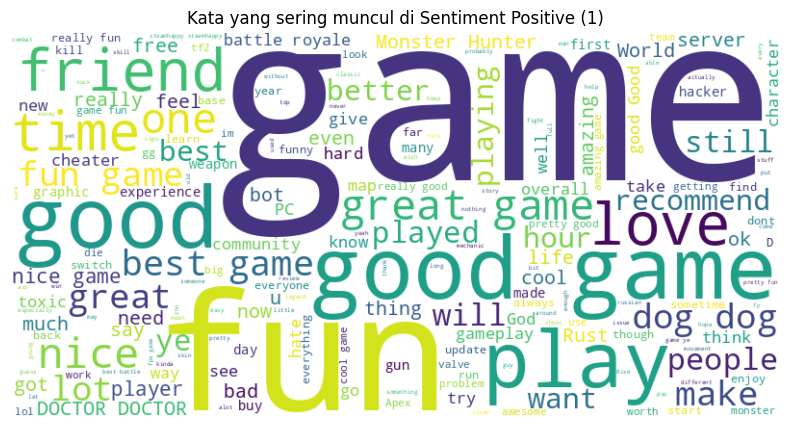

Kata yang sering muncul di Sentiment Positive (1) (10 Kata yang sering muncul):
game: 30492
the: 27747
and: 23135
a: 21580
to: 21136
is: 17436
good: 14193
of: 13727
you: 13378
I: 12920




In [8]:
df['Translated_Review'] = df['Translated_Review'].fillna('').astype(str)
positive_text = ' '.join(df[df['Sentiment'] == 1]['Translated_Review'])
create_wordcloud(positive_text, 'Kata yang sering muncul di Sentiment Positive (1)')
display_word_frequencies(positive_text, 'Kata yang sering muncul di Sentiment Positive (1)')

Selain 10 kata lain, terdapat kata 
- fun
- friend
- dog
- time
- greate

di sini dog terasa seperti kata yang negative.

### Kata yang sering muncul pada sentiment **Negative**.

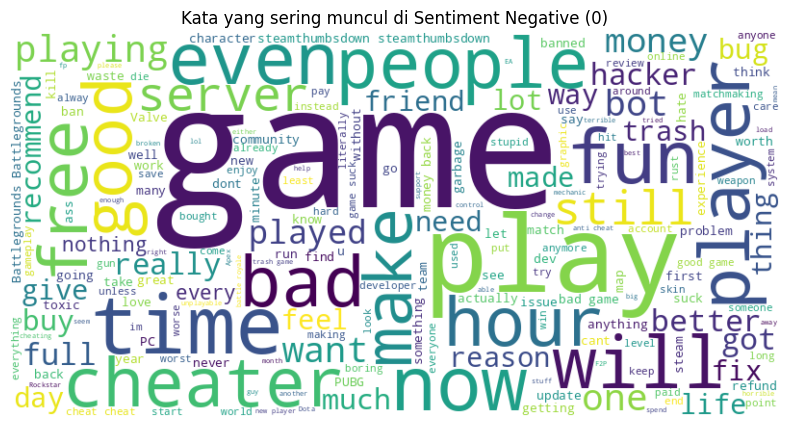

Kata yang sering muncul di Sentiment Negative (0) (10 Kata yang sering muncul):
the: 11468
and: 9068
to: 8928
game: 8649
a: 7342
is: 5912
of: 5392
this: 5313
I: 5055
you: 4776




In [9]:
negative_text = ' '.join(df[df['Sentiment'] == 0]['Translated_Review'])
create_wordcloud(negative_text, 'Kata yang sering muncul di Sentiment Negative (0)')
display_word_frequencies(negative_text, 'Kata yang sering muncul di Sentiment Negative (0)')

selain kata di atas terdapat kata :
- time, kata ini muncul juga di sentiment positive.
- cheater
- hacker
- good, muncul di positive.
- bug
- trash
- fun, muncul di positive.

## Distribusi data Sentiment.

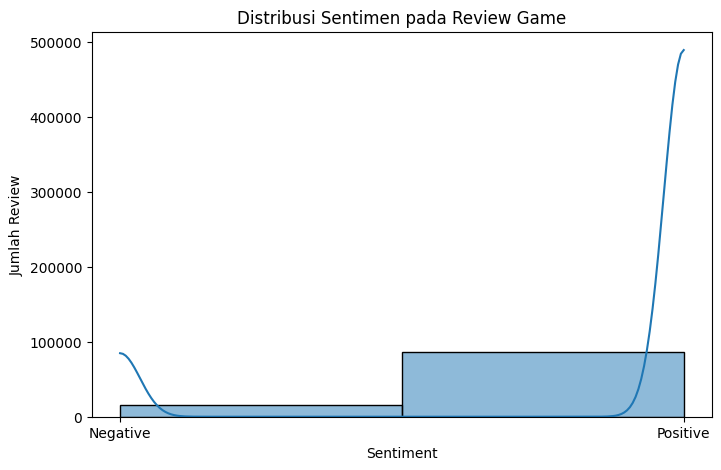

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Sentiment'], bins=2, kde=True)

plt.xlabel("Sentiment")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen pada Review Game")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()

In [11]:
df['Sentiment'].value_counts()

Sentiment
1    86679
0    15015
Name: count, dtype: int64

Di sini bisa dilihat terdapat imbalance pada data. Saya akan melakukan undersampling untuk menyetarakan target (sentiment).

In [12]:
X = df.drop(columns=['Sentiment'])  
y = df['Sentiment']  

rus = RandomUnderSampler(sampling_strategy=1.0, random_state=42) 
X_resampled, y_resampled = rus.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Sentiment'])], axis=1)

/home/dzaki/miniconda3/envs/deeplearn/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/home/dzaki/miniconda3/envs/deeplearn/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


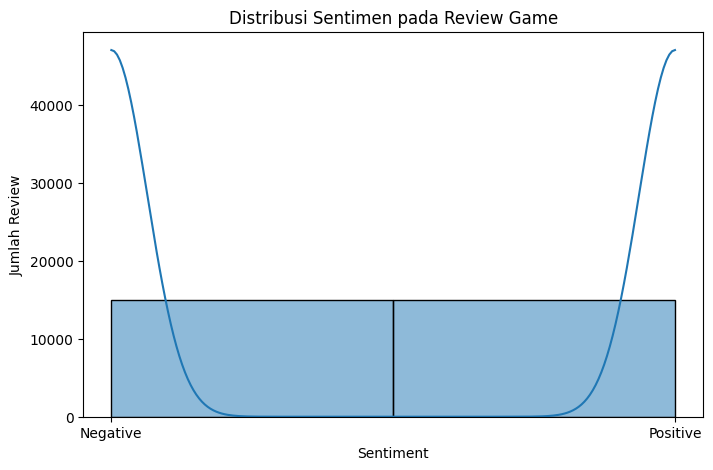

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df_resampled['Sentiment'], bins=2, kde=True)

plt.xlabel("Sentiment")
plt.ylabel("Jumlah Review")
plt.title("Distribusi Sentimen pada Review Game")
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"])
plt.show()

In [14]:
df_resampled['Sentiment'].value_counts()

Sentiment
0    15015
1    15015
Name: count, dtype: int64

Sekarang sudah seimbang.

# Feature Engineering

## Text PreProcessing

Kode di bawah ini untuk menghilangkan emoji, simbol, stopwords, dan melakukan stemmer dan lemmatizer.

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
text_column = 'Translated_Review' 

def clean_text(text):
    text = text.lower() 
    text = re.sub(r'\d+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip() 
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

stemmer = PorterStemmer()
def apply_stemming(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

lemmatizer = WordNetLemmatizer()
def apply_lemmatization(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df_resampled[text_column] = df_resampled[text_column].astype(str).apply(clean_text)
df_resampled[text_column] = df_resampled[text_column].apply(remove_stopwords)
df_resampled[text_column] = df_resampled[text_column].apply(apply_lemmatization)

[nltk_data] Downloading package stopwords to /home/dzaki/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dzaki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/dzaki/nltk_data...


In [17]:
df_resampled

,Translated_Review,Sentiment
3,worst game done ever played life,0
7,damn give money back lmao fp,0
9,hero boring gameplay,0
10,completely retarded new map could spend hour c...,0
15,cant recommend buying game fixed save game bug...,0
...,...,...
19083,game really good dont mind called n word russi...,1
10821,nice,1
35202,best br game,1
59488,,1


## Splitting

In [18]:
X_train_val, X_test, y_train_val, y_test = train_test_split(df_resampled.Translated_Review,
                                                    df_resampled.Sentiment,
                                                    test_size=0.15,
                                                    random_state=20,
                                                    stratify=df_resampled.Sentiment)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (22972,)
Val Size   :  (2553,)
Test Size  :  (4505,)


## Text Vectorization

Pada tahap ini membuat dan mencontohkan proses Vectorization. Tiap kata akan dimasukkan ke tensor.

In [19]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec

<22972x16906 sparse matrix of type '<class 'numpy.int64'>'
	with 192406 stored elements in Compressed Sparse Row format>

In [20]:
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  16906
Maximum Sentence Length :  918 tokens


In [21]:
from tensorflow.keras.layers import TextVectorization

text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,)) # Only use in Sequential API

text_vectorization.adapt(X_train)

/home/dzaki/miniconda3/envs/deeplearn/lib/python3.9/site-packages/keras/src/layers/preprocessing/text_vectorization.py:340: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)
W0000 00:00:1738480241.676593    7245 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [22]:
df_resampled = df_resampled.reset_index(drop=True)

In [23]:
print('Document example')
print(df_resampled.Translated_Review[0])
print('')

## Result of Text Vectorization
print('Result of Text Vectorization')
print(text_vectorization([df_resampled.Translated_Review[0]]))
print('Vector size : ', text_vectorization([df_resampled.Translated_Review[0]]).shape)

Document example
worst game done ever played life

Result of Text Vectorization
tf.Tensor(
[[114   2 328  41  30  51   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0

In [24]:
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 np.str_('game'),
 np.str_('good'),
 np.str_('play'),
 np.str_('fun'),
 np.str_('get'),
 np.str_('like'),
 np.str_('dont'),
 np.str_('time'),
 np.str_('player'),
 np.str_('even'),
 np.str_('bad'),
 np.str_('people'),
 np.str_('playing'),
 np.str_('hour'),
 np.str_('great'),
 np.str_('free'),
 np.str_('one'),
 np.str_('server')]

## Embedding

**CATATAN** Saat proses training saya tidak memanggil variable embedding ini. Saya manual isi model_lstm_1.add(Embedding(input_dim=10000, output_dim=128)). Karena sudah terlanjur saya train dan train membutuhkan waktu yang lama. Saya tidak lakukan masukkan Embedding di bawah ini.

In [63]:
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)

/home/dzaki/miniconda3/envs/deeplearn/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [64]:
print('Document example')
print(df_resampled.Translated_Review[0])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([df_resampled.Translated_Review[0]]))
print('Vector size : ', text_vectorization([df_resampled.Translated_Review[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([df_resampled.Translated_Review[0]])))
print('Vector size : ', embedding(text_vectorization([df_resampled.Translated_Review[0]])).shape)

Document example
worst game done ever played life

Result of  Text Vectorization
tf.Tensor(
[[114   2 328  41  30  51   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]], shape=(1, 100), dtype=int64)
Vector size :  (1, 100)

Result of  Embedding
tf.Tensor(
[[[-0.00871744  0.04792977  0.03504239 ... -0.02222306 -0.03591019
    0.01349712]
  [-0.03045648 -0.01313937 -0.01488411 ... -0.0015794   0.04505166
   -0.04352928]
  [-0.00129082 -0.03259121  0.00084461 ...  0.00140308  0.03413782
   -0.02844787]
  ...
  [ 0.00165005 -0.00518624 -0.04230832 ... -0.01814074  0.04203481
   -0.04115506]
  [ 0.00165005 -0.00518624 -0.04230832 ... -0.01814074  0.04203481
  

# Modeling LSTM

**catatan**

Di sini saya tidak pakai embedding yang tadi di buat. Terjadi error, saya tidak begitu mengerti saat dibuat seperti di bawah ini baru bisa.

## Model Pertama

In [29]:
# saya ubah menjadi string untuk xtrain dan xval, kalau tidak error.
X_train = list(map(str, X_train))  
X_val = list(map(str, X_val))      
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.string)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.string)


text_vectorization = TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=100)
text_vectorization.adapt(X_train_tensor)

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

model_lstm_1 = Sequential()
model_lstm_1.add(text_vectorization) 
model_lstm_1.add(Embedding(input_dim=10000, output_dim=128)) 
model_lstm_1.add(LSTM(32, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Bidirectional(LSTM(16, return_sequences=False, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(10, activation='relu'))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(5, activation='relu'))
model_lstm_1.add(Dropout(0.1))
model_lstm_1.add(Dense(3, activation='softmax'))  

model_lstm_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_1_hist = model_lstm_1.fit(X_train_tensor, y_train, epochs=50, validation_data=(X_val_tensor, y_val))


Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 135s 174ms/step - accuracy: 0.6380 - loss: 0.7059 - val_accuracy: 0.7826 - val_loss: 0.4540
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 111s 154ms/step - accuracy: 0.7804 - loss: 0.4588 - val_accuracy: 0.7850 - val_loss: 0.4522
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 105s 146ms/step - accuracy: 0.8146 - loss: 0.3986 - val_accuracy: 0.7889 - val_loss: 0.4615
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 123s 120ms/step - accuracy: 0.8523 - loss: 0.3603 - val_accuracy: 0.7869 - val_loss: 0.4944
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 97s 135ms/step - accuracy: 0.8679 - loss: 0.3287 - val_accuracy: 0.7834 - val_loss: 0.5250
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 95s 132ms/step - accuracy: 0.8765 - loss: 0.3038 - val_accuracy: 0.7842 - val_loss: 0.5514
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 99s 137ms/step - accuracy: 0.8816 - loss: 0.2906 - val_accuracy: 0.7842 - val_loss: 0.5795
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 137s 131ms/step - accuracy: 0.8874 - lo

## Evaluasi model pertama

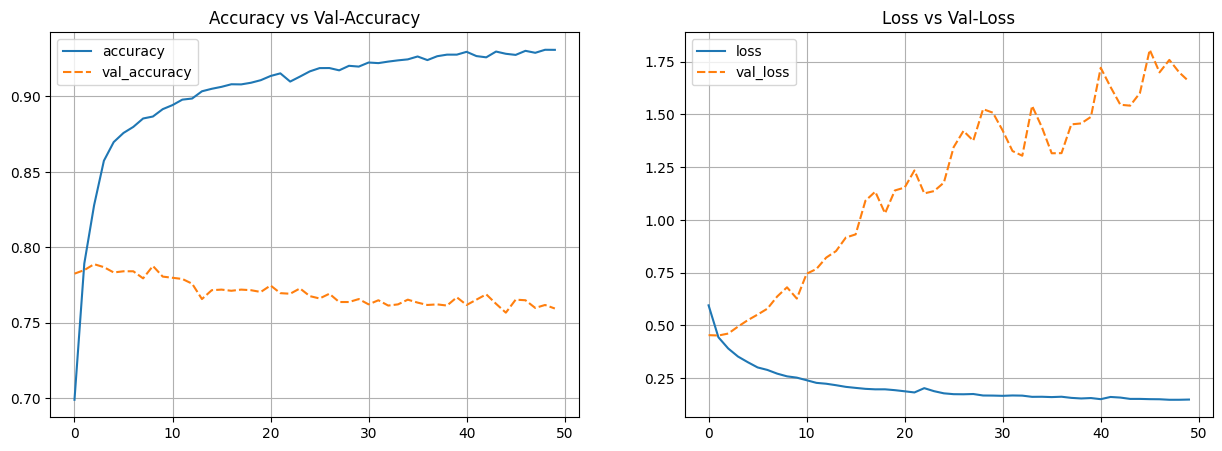

In [30]:
model_lstm_1_hist_df = pd.DataFrame(model_lstm_1_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_1_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_1_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari hasil training pertama kita bisa lihat bahwa :
- Training accuracy meningkat terus (misalnya, mencapai 0.88 di epoch 10 dan terus naik). Sedangkan Validation accuracy relatif stabil di 0.78 tanpa peningkatan signifikan. Artinya model lebih baik dalam **menghafal** data train.
- Dari nilai Loss kita bisa lihat cenderung menurun dan di bawah dari Validation Lossnya. Ini artinya model tidak dapat memprediksi data baru. Karena dari sebelumnya model lebih memilih menghafal.
- Sehingga dapat disimpulkan model pertama ini **Overfitted**.

## Model kedua

Karena model pertama Overfitted dibuatlah model kedua.

Di sini saya tambahkan/ganti :
- Menambahkan early stop
- Menambah nilai Layer LSTM dari 32 menjadi 64.
- Menambah nilai Dropout dari 0.1 menjadi 0.3.
- Menambahkan L2 Regulation pada Dense layer dengan nilai (0.1)

In [49]:
X_train = list(map(str, X_train))  
X_val = list(map(str, X_val))      

# untuk Early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.string)
X_val_tensor = tf.convert_to_tensor(X_val, dtype=tf.string)

text_vectorization = TextVectorization(max_tokens=10000, output_mode='int', output_sequence_length=100)
text_vectorization.adapt(X_train_tensor)

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

model_lstm_2 = Sequential()
model_lstm_2.add(text_vectorization) 
model_lstm_2.add(Embedding(input_dim=10000, output_dim=128)) 
model_lstm_2.add(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed)))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Bidirectional(LSTM(16, return_sequences=False, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Dense(5, activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model_lstm_2.add(Dropout(0.3))
model_lstm_2.add(Dense(3, activation='softmax')) 

model_lstm_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm_2_hist = model_lstm_2.fit(X_train_tensor, y_train, epochs=50, validation_data=(X_val_tensor, y_val), callbacks=[early_stopping])


Epoch 1/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 169s 225ms/step - accuracy: 0.5788 - loss: 1.6505 - val_accuracy: 0.7736 - val_loss: 0.6040
Epoch 2/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 200s 279ms/step - accuracy: 0.7525 - loss: 0.6073 - val_accuracy: 0.7807 - val_loss: 0.5424
Epoch 3/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 169s 235ms/step - accuracy: 0.7852 - loss: 0.5446 - val_accuracy: 0.7889 - val_loss: 0.5264
Epoch 4/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 185s 257ms/step - accuracy: 0.8013 - loss: 0.5087 - val_accuracy: 0.7818 - val_loss: 0.5279
Epoch 5/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 163s 227ms/step - accuracy: 0.8137 - loss: 0.4824 - val_accuracy: 0.7716 - val_loss: 0.5410
Epoch 6/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 160s 222ms/step - accuracy: 0.8243 - loss: 0.4582 - val_accuracy: 0.7626 - val_loss: 0.5401
Epoch 7/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 161s 225ms/step - accuracy: 0.8250 - loss: 0.4540 - val_accuracy: 0.7803 - val_loss: 0.5342
Epoch 8/50
718/718 ━━━━━━━━━━━━━━━━━━━━ 164s 229ms/step - accuracy: 0.8352 -

## Evaluasi model kedua

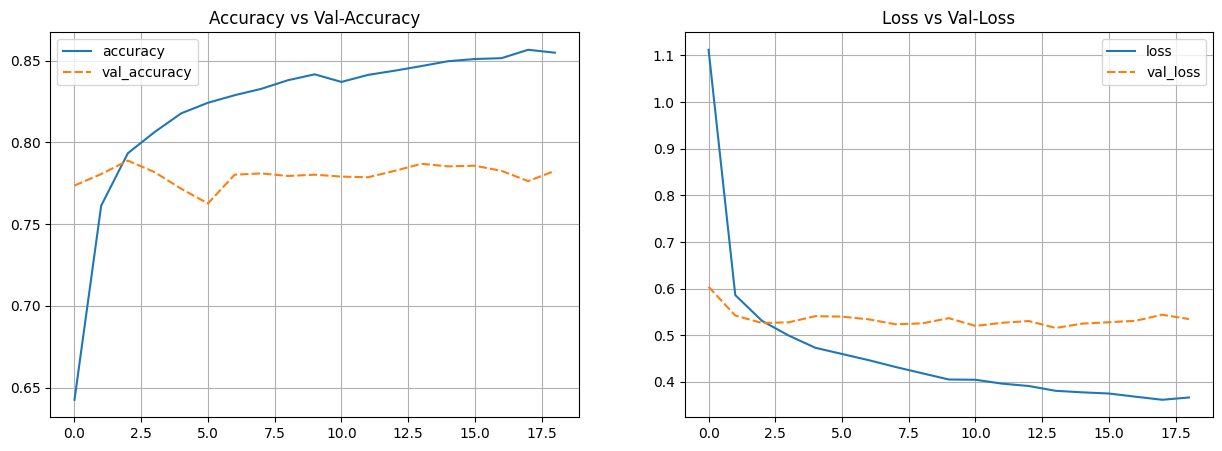

In [50]:
model_lstm_2_hist_df = pd.DataFrame(model_lstm_2_hist.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=model_lstm_2_hist_df[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=model_lstm_2_hist_df[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

Dari hasil model kedua dapat disimpulkan bahwa :
- Dilihat dari hasil model 2 ini juga sama saja, **overfitting**.
- Namun dilihat dari waktu trainingnya, **model 2 lebih cepat dari model 1**. Hal ini karena ditambahkannya early stop pada model 2. 
- Waktu train dapat dilihat di : https://drive.google.com/drive/folders/1OcFJW1vm14rkcKzdcE7XrkvhI4SXVKok

+ Jadi model yang saya akan pakai untuk Inference adalah model 2

# Saving Model

Karena model kedua memiliki waktu train yang lebih singkat, jadi saya akan save model ke 2.

Di sini saya save .keras dan .h5. Antisipasi jika butuh 2-2nya.

In [ ]:
model_lstm_2.save('model_lstm_2.h5')

In [60]:
model_lstm_2.save('model_lstm_2.keras')

# Kesimpulan

- Model overfit, terlalu menghafal data training.
- Ketika saya coba di Inference, **tetap bisa menebak** sentiment dari review. Tetapi kedepannya jika ada review baru, **kemungkinan besar model tidak dapat memprediksi**.